In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

In [3]:
all_stream_info = pd.read_csv("all_stream_info.csv")
all_stream_info_data_dict =  pd.read_csv("all_stream_info_data_dictionary.csv")

In [4]:
all_stream_info.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,...,NaN,779,46,30,68,17,13,424.32,1108,13105
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,...,NaN,821,54,38,68,20,8,186.28,2318,90701
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,...,NaN,1605,529,223,696,60,17,81.14,1199,222376
3,109438917,2020-06-22 12:54:21 UTC,2020-06-22 14:47:27 UTC,6786,normalEnd,44,2020-06-22 14:29:13.806 UTC,0,191,0,...,NaN,96,23,24,41,12,8,389.91,432,4313
4,109442185,2020-06-22 15:18:20 UTC,2020-06-22 15:48:02 UTC,1782,normalEnd,52,2020-06-22 15:42:33.849 UTC,0,77,0,...,NaN,109,20,18,38,17,5,222.76,162,1547


In [15]:
all_stream_info.tail()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
3143,109413699,2020-06-20 16:48:56 UTC,2020-06-20 18:51:04 UTC,7328,normalEnd,7,2020-06-20 17:18:50.606 UTC,0,134,0,...,NaN,42,18,18,34,8,3,239.86,212,33
3144,109415658,2020-06-20 22:47:12 UTC,2020-06-21 00:32:00 UTC,6288,normalEnd,37,2020-06-20 22:59:11.597 UTC,0,143,0,...,NaN,93,48,40,82,6,2,51.41,77,1328
3145,109400227,2020-06-20 00:09:39 UTC,2020-06-20 02:38:47 UTC,8948,normalEnd,4,2020-06-20 01:04:42.528 UTC,0,41,0,...,NaN,15,12,3,14,4,0,112.67,58,32
3146,109401955,2020-06-20 03:55:09 UTC,2020-06-20 05:05:08 UTC,4199,normalEnd,7,2020-06-20 04:35:33.638 UTC,0,72,0,...,NaN,44,21,23,41,12,8,232.02,190,39166
3147,109414606,2020-06-20 18:49:40 UTC,2020-06-20 21:55:58 UTC,11178,normalEnd,19,2020-06-20 21:51:22.06 UTC,0,21,0,...,NaN,120,36,43,73,18,13,788.23,655,24377


In [17]:
all_stream_info_data_dict

,Column name,Description
0,liveStreamID,stream unique ID
1,beginTime,stream begin time
2,endTime,stream end time
3,duration,stream duration in sec
4,closeBy,How the stream ended
5,maxLiveViewerCount,The max number of live viewers at any time dur...
6,maxLiveViewerTime,time at which max viewers were live
7,privateLiveStream,Whether it is private or public stream
8,receivedLikeCount,number of likes received
9,streamerType,streamerType\n0 - LiveStream\n1 - Show\n2 - re...


In [19]:
all_stream_info.describe()

,liveStreamID,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,cultureGroup,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
count,3.148000e+03,3148.000000,3148.000000,3148.0,3148.000000,3148.0,0.0,0.0,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,1689.000000,3148.000000,3.148000e+03
mean,1.093797e+08,3495.864041,15.416773,0.0,358.428526,0.0,NaN,NaN,55.416773,26.285896,20.519377,44.560991,8.994917,3.937103,241.049467,126.772872,8.874376e+03
std,3.381310e+04,6651.916426,45.505183,0.0,2145.579197,0.0,NaN,NaN,160.855894,81.280647,60.532012,131.896474,26.843270,13.057200,244.360800,330.297666,4.778547e+04
min,1.093211e+08,0.000000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.093518e+08,136.750000,0.000000,0.0,0.000000,0.0,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,83.060000,0.000000,0.000000e+00
50%,1.093835e+08,1032.500000,2.000000,0.0,0.000000,0.0,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,185.300000,1.000000,0.000000e+00
75%,1.094082e+08,4801.500000,8.000000,0.0,62.000000,0.0,NaN,NaN,39.000000,20.000000,11.000000,31.000000,8.000000,3.000000,318.980000,112.250000,1.501500e+03
max,1.094427e+08,121258.000000,493.000000,0.0,65831.000000,0.0,NaN,NaN,2385.000000,1639.000000,730.000000,2142.000000,493.000000,302.000000,2855.000000,5342.000000,1.474727e+06


In [130]:
all_stream_info.dtypes

liveStreamID               int64
beginTime                 object
endTime                   object
duration                   int64
closeBy                   object
maxLiveViewerCount         int64
maxLiveViewerTime         object
privateLiveStream          int64
receivedLikeCount          int64
streamerType               int64
isShow                      bool
cultureGroup             float64
userID                    object
registerCountry           object
isContracted             float64
uniqueViewerCount          int64
ios                        int64
android                    int64
durationGTE5sec            int64
durationGTE2min            int64
durationGTE10min           int64
avgViewerDuration        float64
count                      int64
receivePointEstimated      int64
dtype: object

In [35]:
missing_categorical = [var for var in all_stream_info.columns if all_stream_info[var].isnull().mean()>0 and all_stream_info[var].dtypes == 'O']

In [36]:
missing_categorical

['closeBy', 'maxLiveViewerTime']

In [133]:
missing_numerical = [var for var in all_stream_info.columns if all_stream_info[var].isnull().mean()>0 and (all_stream_info[var].dtypes == 'float64' or all_stream_info[var].dtypes == 'int64' )]

In [134]:
missing_numerical

['cultureGroup', 'isContracted', 'avgViewerDuration']

## Handling Categorical Values 

In [39]:
all_stream_info["closeBy"].isnull().mean()

0.030813214739517154

In [40]:
all_stream_info["closeBy"].isnull().sum()

97

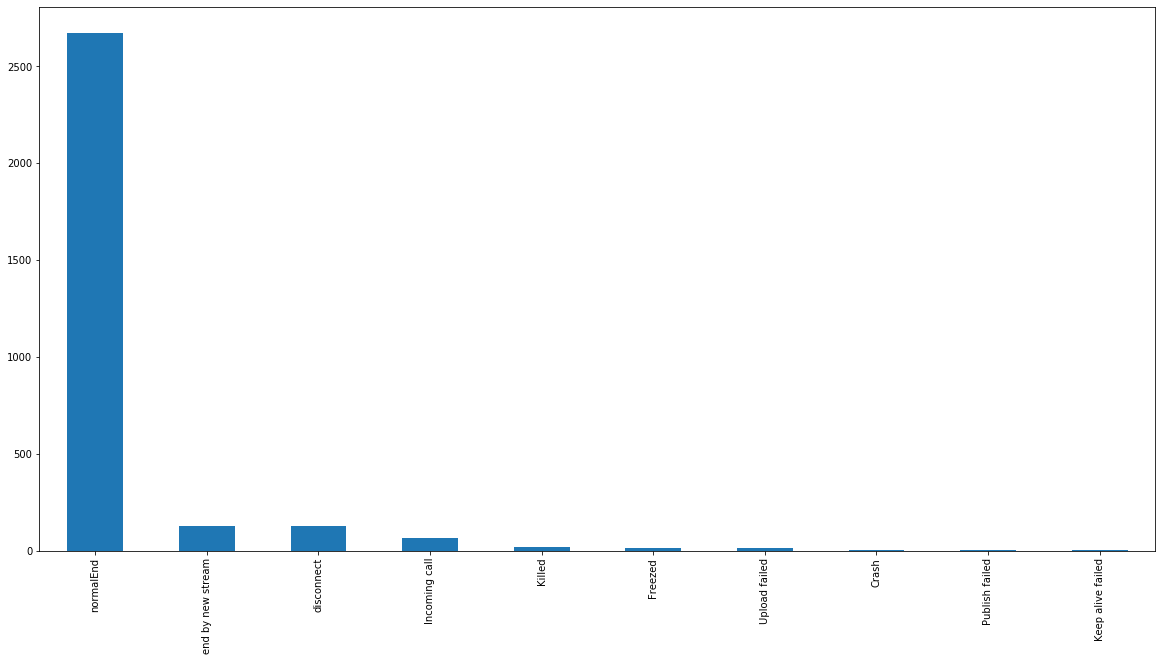

In [45]:
plt.figure(figsize=(20,10))
all_stream_info["closeBy"].value_counts().plot.bar()
plt.show()

In [46]:
all_stream_info["closeBy"].mode()

0    normalEnd
dtype: object

In [49]:
all_stream_info["closeBy"].fillna('normalEnd',inplace = True)

In [50]:
all_stream_info["closeBy"].isnull().sum()

0

In [51]:
all_stream_info["maxLiveViewerTime"].isnull().mean()

0.4161372299872935

In [52]:
all_stream_info["maxLiveViewerTime"].isnull().sum()

1310

In [57]:
all_stream_info["maxLiveViewerTime"].mode()

0       2020-06-15 00:15:33.442 UTC
1       2020-06-15 00:21:43.015 UTC
2       2020-06-15 00:30:03.571 UTC
3       2020-06-15 00:32:51.494 UTC
4       2020-06-15 00:34:21.276 UTC
                   ...             
1833    2020-06-22 16:45:19.952 UTC
1834    2020-06-22 17:04:12.298 UTC
1835    2020-06-22 17:19:39.697 UTC
1836    2020-06-22 17:19:48.148 UTC
1837    2020-06-22 19:07:52.872 UTC
Length: 1838, dtype: object

## Handling Numerical values

### 'cultureGroup', 'isContracted', 'avgViewerDuration' in these columns there is null values 

In [58]:
all_stream_info["cultureGroup"].isnull().sum()

3148

In [59]:
all_stream_info["cultureGroup"].isnull().mean()

1.0

In [60]:
all_stream_info["isContracted"].isnull().sum()

3148

In [61]:
all_stream_info["isContracted"].isnull().mean()

1.0

In [62]:
#avgViewerDuration
all_stream_info["avgViewerDuration"].isnull().sum()

1459

In [63]:
all_stream_info["avgViewerDuration"].isnull().mean()

0.46346886912325286

In [64]:
all_stream_info["avgViewerDuration"].mode()

0    7.0
dtype: float64

In [65]:
all_stream_info["avgViewerDuration"].mean()

241.04946714031965

In [67]:
all_stream_info["avgViewerDuration"].fillna(7,inplace = True)

In [68]:
all_stream_info["avgViewerDuration"].isnull().sum()

0

In [69]:
all_stream_info.head()

,liveStreamID,beginTime,endTime,duration,closeBy,maxLiveViewerCount,maxLiveViewerTime,privateLiveStream,receivedLikeCount,streamerType,...,isContracted,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
0,109437538,2020-06-22 11:55:21 UTC,2020-06-22 16:37:19 UTC,16918,normalEnd,363,2020-06-22 16:28:17.87 UTC,0,11092,0,...,NaN,779,46,30,68,17,13,424.32,1108,13105
1,109441785,2020-06-22 14:55:26 UTC,2020-06-22 21:31:19 UTC,23753,normalEnd,100,2020-06-22 19:07:52.872 UTC,0,772,0,...,NaN,821,54,38,68,20,8,186.28,2318,90701
2,109438205,2020-06-22 12:20:34 UTC,2020-06-22 16:02:46 UTC,13332,disconnect,471,2020-06-22 14:53:26.692 UTC,0,19403,0,...,NaN,1605,529,223,696,60,17,81.14,1199,222376
3,109438917,2020-06-22 12:54:21 UTC,2020-06-22 14:47:27 UTC,6786,normalEnd,44,2020-06-22 14:29:13.806 UTC,0,191,0,...,NaN,96,23,24,41,12,8,389.91,432,4313
4,109442185,2020-06-22 15:18:20 UTC,2020-06-22 15:48:02 UTC,1782,normalEnd,52,2020-06-22 15:42:33.849 UTC,0,77,0,...,NaN,109,20,18,38,17,5,222.76,162,1547


In [72]:
all_stream_info.columns

Index(['liveStreamID', 'beginTime', 'endTime', 'duration', 'closeBy',
       'maxLiveViewerCount', 'maxLiveViewerTime', 'privateLiveStream',
       'receivedLikeCount', 'streamerType', 'isShow', 'cultureGroup', 'userID',
       'registerCountry', 'isContracted', 'uniqueViewerCount', 'ios',
       'android', 'durationGTE5sec', 'durationGTE2min', 'durationGTE10min',
       'avgViewerDuration', 'count', 'receivePointEstimated'],
      dtype='object')

In [76]:
all_stream_info.drop(['beginTime', 'endTime','maxLiveViewerTime','cultureGroup','isContracted'], axis = 1,inplace=True)

In [77]:
all_stream_info.head()

,liveStreamID,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,userID,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
0,109437538,16918,normalEnd,363,0,11092,0,False,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,United States,779,46,30,68,17,13,424.32,1108,13105
1,109441785,23753,normalEnd,100,0,772,0,False,6cd90016-b679-4a7b-8cc6-2c43d4590cca,United States,821,54,38,68,20,8,186.28,2318,90701
2,109438205,13332,disconnect,471,0,19403,0,False,e4f04b19-ad3e-4c9d-7f29-6a2f6c93c842,United States,1605,529,223,696,60,17,81.14,1199,222376
3,109438917,6786,normalEnd,44,0,191,0,False,b4dc876b-06fe-48b2-a40b-fa7f5007697a,United States,96,23,24,41,12,8,389.91,432,4313
4,109442185,1782,normalEnd,52,0,77,0,False,8258d28e-47b9-4ce8-a765-29175b663a1d,United States,109,20,18,38,17,5,222.76,162,1547


In [78]:
all_stream_info.to_csv("updated_csv.csv")

## We have elliminate some columns which have no use in model building and saved in csv file now uploading that file  in notebook and doing some EDA and moving towards model building 

In [5]:
data = pd.read_csv("updated_csv.csv")

In [6]:
data.head()

,Unnamed: 0,liveStreamID,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,userID,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
0,0,109437538,16918,normalEnd,363,0,11092,0,False,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,United States,779,46,30,68,17,13,424.32,1108,13105
1,1,109441785,23753,normalEnd,100,0,772,0,False,6cd90016-b679-4a7b-8cc6-2c43d4590cca,United States,821,54,38,68,20,8,186.28,2318,90701
2,2,109438205,13332,disconnect,471,0,19403,0,False,e4f04b19-ad3e-4c9d-7f29-6a2f6c93c842,United States,1605,529,223,696,60,17,81.14,1199,222376
3,3,109438917,6786,normalEnd,44,0,191,0,False,b4dc876b-06fe-48b2-a40b-fa7f5007697a,United States,96,23,24,41,12,8,389.91,432,4313
4,4,109442185,1782,normalEnd,52,0,77,0,False,8258d28e-47b9-4ce8-a765-29175b663a1d,United States,109,20,18,38,17,5,222.76,162,1547


In [7]:
data['duration'].describe()

count      3148.000000
mean       3495.864041
std        6651.916426
min           0.000000
25%         136.750000
50%        1032.500000
75%        4801.500000
max      121258.000000
Name: duration, dtype: float64

In [8]:
data.describe()

,Unnamed: 0,liveStreamID,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
count,3148.00000,3.148000e+03,3148.000000,3148.000000,3148.0,3148.000000,3148.0,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3148.000000,3.148000e+03
mean,1573.50000,1.093797e+08,3495.864041,15.416773,0.0,358.428526,0.0,55.416773,26.285896,20.519377,44.560991,8.994917,3.937103,132.574825,126.772872,8.874376e+03
std,908.89365,3.381310e+04,6651.916426,45.505183,0.0,2145.579197,0.0,160.855894,81.280647,60.532012,131.896474,26.843270,13.057200,213.669542,330.297666,4.778547e+04
min,0.00000,1.093211e+08,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,786.75000,1.093518e+08,136.750000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000e+00
50%,1573.50000,1.093835e+08,1032.500000,2.000000,0.0,0.000000,0.0,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,18.000000,1.000000,0.000000e+00
75%,2360.25000,1.094082e+08,4801.500000,8.000000,0.0,62.000000,0.0,39.000000,20.000000,11.000000,31.000000,8.000000,3.000000,198.567500,112.250000,1.501500e+03
max,3147.00000,1.094427e+08,121258.000000,493.000000,0.0,65831.000000,0.0,2385.000000,1639.000000,730.000000,2142.000000,493.000000,302.000000,2855.000000,5342.000000,1.474727e+06


In [9]:
data.shape

(3148, 20)

In [10]:
data.groupby('closeBy').size()

closeBy
Crash                   4
Freezed                16
Incoming call          65
Keep alive failed       1
Killed                 21
Publish failed          2
Upload failed          13
disconnect            127
end by new stream     129
normalEnd            2770
dtype: int64

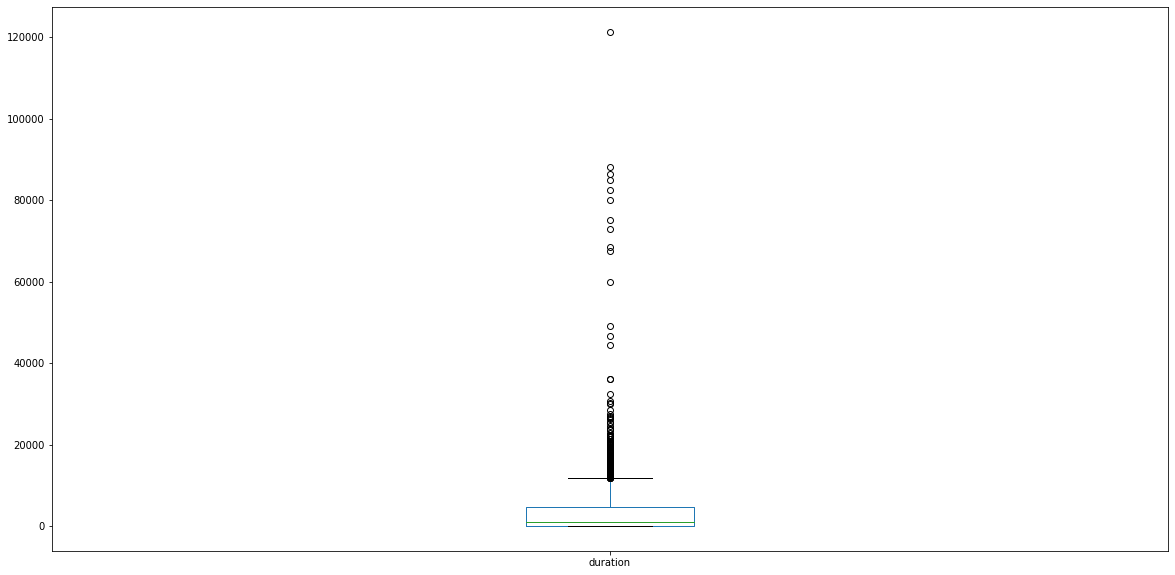

In [11]:
plt.figure(figsize=(20,10))
data["duration"].plot(kind='box',subplots=True,layout=(10,10),sharex=False,sharey=False)
plt.show()

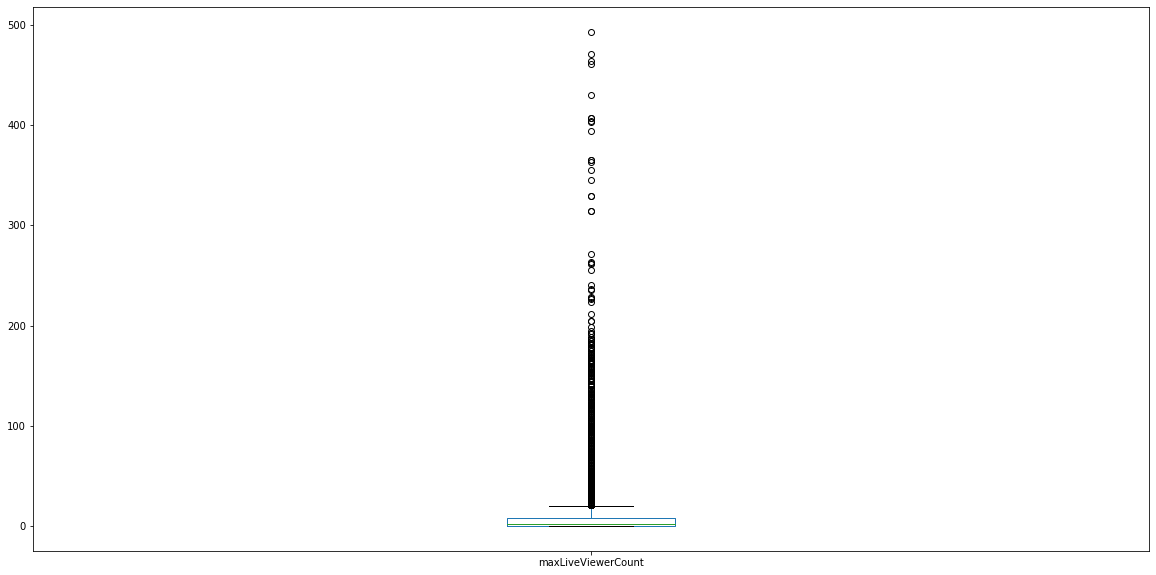

In [12]:
plt.figure(figsize=(20,10))
data["maxLiveViewerCount"].plot(kind='box',subplots=True,layout=(10,10),sharex=False,sharey=False)
plt.show()

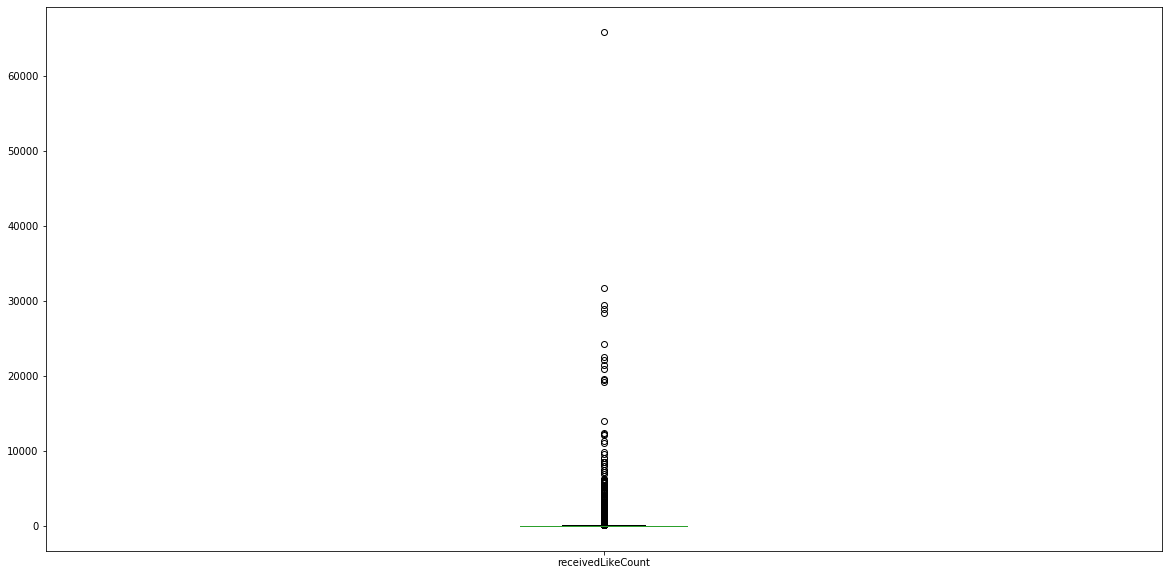

In [13]:
plt.figure(figsize=(20,10))
data["receivedLikeCount"].plot(kind='box',subplots=True,layout=(10,10),sharex=False,sharey=False)
plt.show()

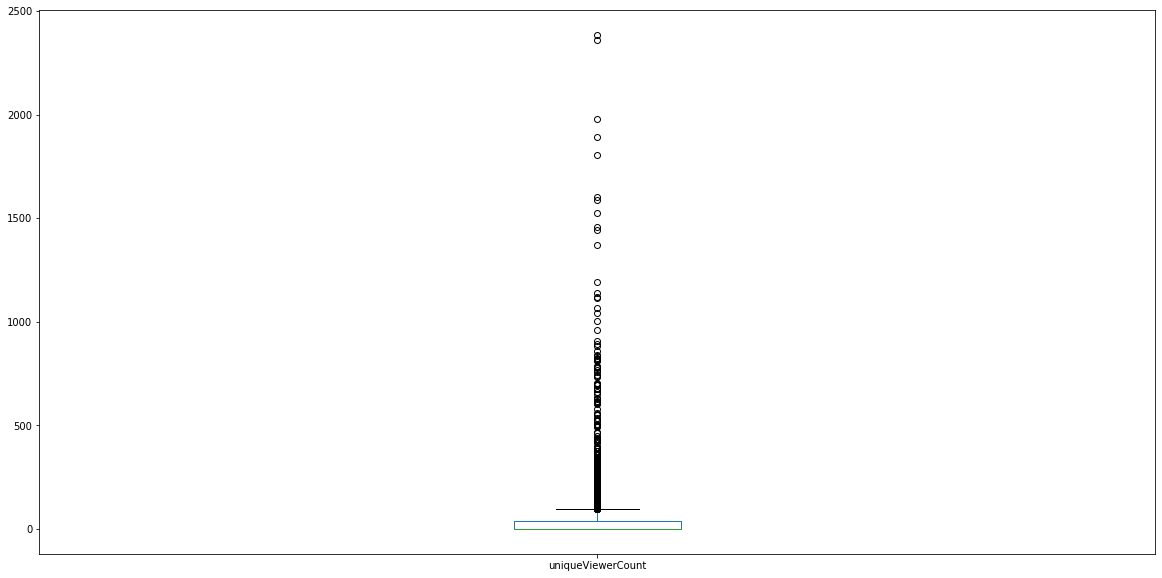

In [14]:
plt.figure(figsize=(20,10))
data["uniqueViewerCount"].plot(kind='box',subplots=True,layout=(10,10),sharex=False,sharey=False)
plt.show()

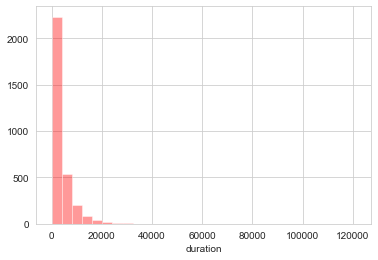

In [15]:
sns.set_style('whitegrid') 
sns.distplot(data["duration"], kde = False, color ='red', bins = 30) 
plt.show()

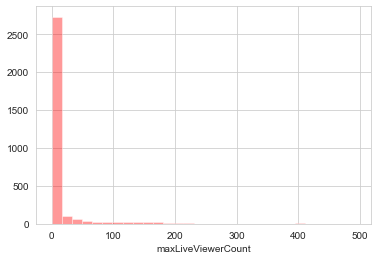

In [16]:
sns.set_style('whitegrid') 
sns.distplot(data["maxLiveViewerCount"], kde = False, color ='red', bins = 30) 
plt.show()

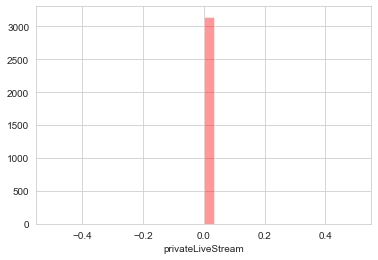

In [17]:
sns.set_style('whitegrid') 
sns.distplot(data["privateLiveStream"], kde = False, color ='red', bins = 30) 
plt.show()

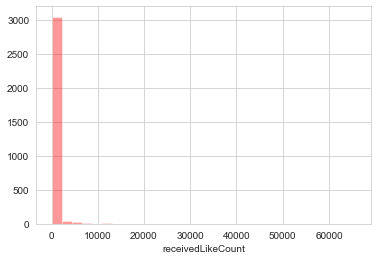

In [18]:
sns.set_style('whitegrid') 
sns.distplot(data["receivedLikeCount"], kde = False, color ='red', bins = 30) 
plt.show()

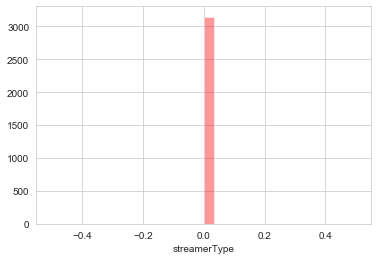

In [19]:
sns.set_style('whitegrid') 
sns.distplot(data["streamerType"], kde = False, color ='red', bins = 30) 
plt.show()

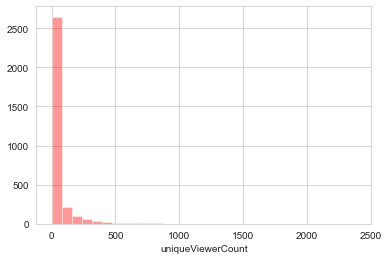

In [20]:
sns.set_style('whitegrid') 
sns.distplot(data["uniqueViewerCount"], kde = False, color ='red', bins = 30) 
plt.show()

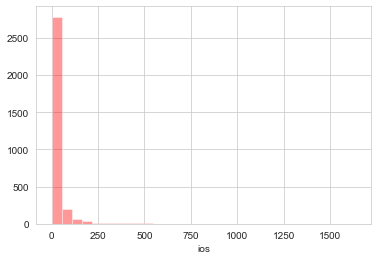

In [21]:
sns.set_style('whitegrid') 
sns.distplot(data["ios"], kde = False, color ='red', bins = 30) 
plt.show()

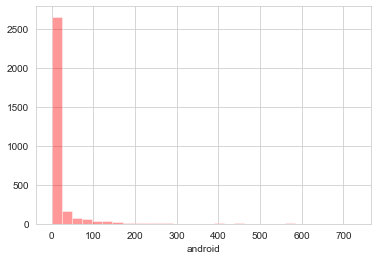

In [22]:
sns.set_style('whitegrid') 
sns.distplot(data["android"], kde = False, color ='red', bins = 30) 
plt.show()

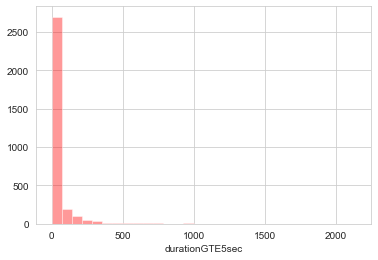

In [23]:
sns.set_style('whitegrid') 
sns.distplot(data["durationGTE5sec"], kde = False, color ='red', bins = 30) 
plt.show()

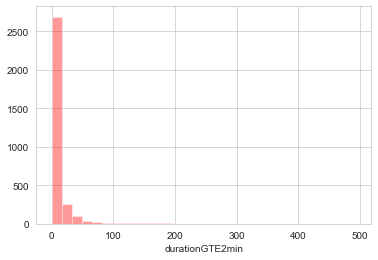

In [24]:
sns.set_style('whitegrid') 
sns.distplot(data["durationGTE2min"], kde = False, color ='red', bins = 30) 
plt.show()

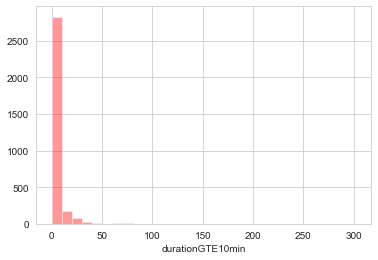

In [25]:
sns.set_style('whitegrid') 
sns.distplot(data["durationGTE10min"], kde = False, color ='red', bins = 30) 
plt.show()

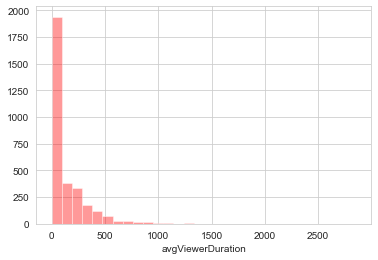

In [26]:
sns.set_style('whitegrid') 
sns.distplot(data["avgViewerDuration"], kde = False, color ='red', bins = 30) 
plt.show()

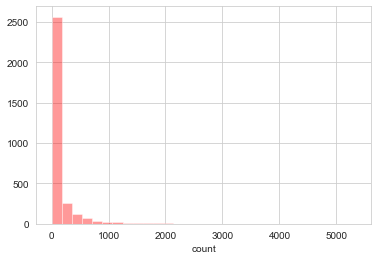

In [27]:
sns.set_style('whitegrid') 
sns.distplot(data["count"], kde = False, color ='red', bins = 30) 
plt.show()

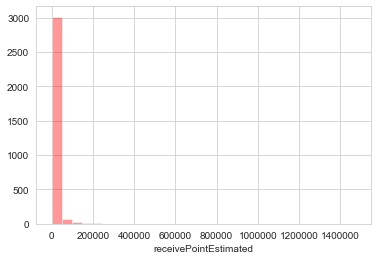

In [28]:
sns.set_style('whitegrid') 
sns.distplot(data["receivePointEstimated"], kde = False, color ='red', bins = 30) 
plt.show()

## After Adding Adding A Columns Of Top Streamer Uploading the data Set in notebook .

In [88]:
data1 = pd.read_csv('Newupdated_csv.csv')

In [89]:
data1.head()

,Unnamed: 0,liveStreamID,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,userID,...,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated,Top_Streamer
0,0,109437538,16918,normalEnd,363,0,11092,0,False,63a8b9eb-c4a6-4ff6-8aaa-5f4c6f6fd4d7,...,779,46,30,68,17,13,424.32,1108,13105,Yes
1,1,109441785,23753,normalEnd,100,0,772,0,False,6cd90016-b679-4a7b-8cc6-2c43d4590cca,...,821,54,38,68,20,8,186.28,2318,90701,No
2,2,109438205,13332,disconnect,471,0,19403,0,False,e4f04b19-ad3e-4c9d-7f29-6a2f6c93c842,...,1605,529,223,696,60,17,81.14,1199,222376,No
3,3,109438917,6786,normalEnd,44,0,191,0,False,b4dc876b-06fe-48b2-a40b-fa7f5007697a,...,96,23,24,41,12,8,389.91,432,4313,Yes
4,4,109442185,1782,normalEnd,52,0,77,0,False,8258d28e-47b9-4ce8-a765-29175b663a1d,...,109,20,18,38,17,5,222.76,162,1547,No


## Droping all the columns which we are not going to use in our model building .

In [90]:
#df.drop(['A'], axis = 1) 

In [91]:
data1.drop(['Unnamed: 0',"liveStreamID",'userID'],axis = 1,inplace=True)

In [92]:
data1.head(20)

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated,Top_Streamer
0,16918,normalEnd,363,0,11092,0,False,United States,779,46,30,68,17,13,424.32,1108,13105,Yes
1,23753,normalEnd,100,0,772,0,False,United States,821,54,38,68,20,8,186.28,2318,90701,No
2,13332,disconnect,471,0,19403,0,False,United States,1605,529,223,696,60,17,81.14,1199,222376,No
3,6786,normalEnd,44,0,191,0,False,United States,96,23,24,41,12,8,389.91,432,4313,Yes
4,1782,normalEnd,52,0,77,0,False,United States,109,20,18,38,17,5,222.76,162,1547,No
5,1749,normalEnd,45,0,107,0,False,United States,116,25,27,52,19,4,192.87,104,3095,No
6,1756,normalEnd,50,0,199,0,False,United States,120,23,19,40,19,12,323.07,106,2112,No
7,1792,normalEnd,365,0,3424,0,False,United States,377,83,53,131,11,4,68.12,143,149405,No
8,233,Incoming call,0,0,0,0,False,United States,0,0,0,0,0,0,7.00,0,0,No
9,5264,end by new stream,0,0,0,0,False,United States,0,0,0,0,0,0,7.00,0,0,No


In [93]:
var1 = data1.groupby('Top_Streamer')
var1.mean()

,duration,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
Top_Streamer,,,,,,,,,,,,,,,
No,2844.738742,12.724991,0.0,290.635957,0.0,False,39.936061,17.885528,15.333104,31.455827,5.629082,2.237882,108.680626,75.772774,5166.075971
Yes,11421.066946,48.179916,0.0,1183.569038,0.0,False,243.841004,128.531381,83.644351,204.071130,49.962343,24.619247,423.404226,747.523013,54010.129707


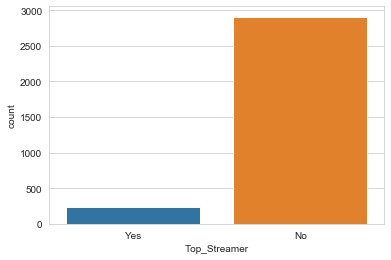

In [94]:
sns.countplot(x=data1.Top_Streamer ,data = data1)
plt.show()

In [95]:
obj_col = []
num_col = []
for col in data1.columns:
    if data1[col].dtype=='O':
        obj_col.append(col)
    else:
        num_col.append(col)

In [96]:
num_col

['duration',
 'maxLiveViewerCount',
 'privateLiveStream',
 'receivedLikeCount',
 'streamerType',
 'isShow',
 'uniqueViewerCount',
 'ios',
 'android',
 'durationGTE5sec',
 'durationGTE2min',
 'durationGTE10min',
 'avgViewerDuration',
 'count',
 'receivePointEstimated']

In [97]:
obj_col

['closeBy', 'registerCountry', 'Top_Streamer']

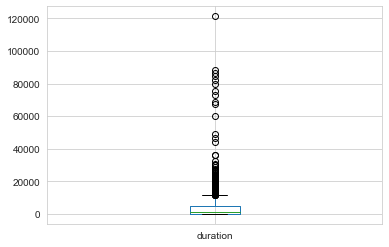

In [98]:
data1.boxplot(column=['duration'])
plt.show()


In [99]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
data1['closeBy'] = labelEncoder_X.fit_transform(data1['closeBy'])
data1['registerCountry'] = labelEncoder_X.fit_transform(data1['registerCountry'])
data1['Top_Streamer'] = labelEncoder_X.fit_transform(data1['Top_Streamer'])


In [100]:
data1.head()

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated,Top_Streamer
0,16918,9,363,0,11092,0,False,0,779,46,30,68,17,13,424.32,1108,13105,1
1,23753,9,100,0,772,0,False,0,821,54,38,68,20,8,186.28,2318,90701,0
2,13332,7,471,0,19403,0,False,0,1605,529,223,696,60,17,81.14,1199,222376,0
3,6786,9,44,0,191,0,False,0,96,23,24,41,12,8,389.91,432,4313,1
4,1782,9,52,0,77,0,False,0,109,20,18,38,17,5,222.76,162,1547,0


In [101]:
#Attriton is dependent var
from sklearn.preprocessing import LabelEncoder
label_encoder_y=LabelEncoder()
data1['Top_Streamer']=label_encoder_y.fit_transform(data1['Top_Streamer'])

In [102]:
data1.head()

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated,Top_Streamer
0,16918,9,363,0,11092,0,False,0,779,46,30,68,17,13,424.32,1108,13105,1
1,23753,9,100,0,772,0,False,0,821,54,38,68,20,8,186.28,2318,90701,0
2,13332,7,471,0,19403,0,False,0,1605,529,223,696,60,17,81.14,1199,222376,0
3,6786,9,44,0,191,0,False,0,96,23,24,41,12,8,389.91,432,4313,1
4,1782,9,52,0,77,0,False,0,109,20,18,38,17,5,222.76,162,1547,0


In [103]:
data1.columns

Index(['duration', 'closeBy', 'maxLiveViewerCount', 'privateLiveStream',
       'receivedLikeCount', 'streamerType', 'isShow', 'registerCountry',
       'uniqueViewerCount', 'ios', 'android', 'durationGTE5sec',
       'durationGTE2min', 'durationGTE10min', 'avgViewerDuration', 'count',
       'receivePointEstimated', 'Top_Streamer'],
      dtype='object')

In [104]:
corr_cols = data1[['duration', 'closeBy', 'maxLiveViewerCount', 'privateLiveStream',
       'receivedLikeCount', 'streamerType', 'isShow', 'registerCountry',
       'uniqueViewerCount', 'ios', 'android', 'durationGTE5sec',
       'durationGTE2min', 'durationGTE10min', 'avgViewerDuration', 'count',
       'receivePointEstimated', 'Top_Streamer' ]]

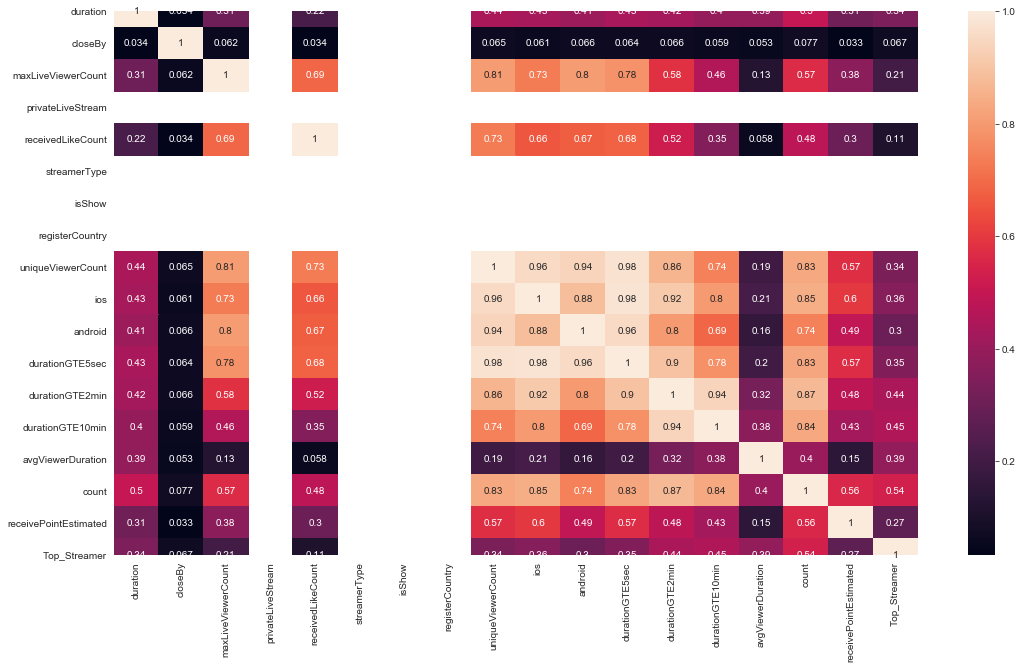

In [105]:
corr = corr_cols.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot = True)
plt.show()

In [106]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1]

In [107]:
X.head()

,duration,closeBy,maxLiveViewerCount,privateLiveStream,receivedLikeCount,streamerType,isShow,registerCountry,uniqueViewerCount,ios,android,durationGTE5sec,durationGTE2min,durationGTE10min,avgViewerDuration,count,receivePointEstimated
0,16918,9,363,0,11092,0,False,0,779,46,30,68,17,13,424.32,1108,13105
1,23753,9,100,0,772,0,False,0,821,54,38,68,20,8,186.28,2318,90701
2,13332,7,471,0,19403,0,False,0,1605,529,223,696,60,17,81.14,1199,222376
3,6786,9,44,0,191,0,False,0,96,23,24,41,12,8,389.91,432,4313
4,1782,9,52,0,77,0,False,0,109,20,18,38,17,5,222.76,162,1547


In [108]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: Top_Streamer, dtype: int64

In [109]:
from sklearn.preprocessing import scale
X = scale(X)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20,random_state = 30)

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
model = RandomForestClassifier()

In [114]:
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
predict = model.predict(X_test)

## Model Evaluation 

In [116]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [117]:
accuracy_score(y_test,predict)

0.9634920634920635

In [118]:
from pprint import pprint# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [119]:
from sklearn.metrics import fbeta_score

In [136]:
print('F1 Score:', fbeta_score(y_test,predict, beta=2, average='micro'))

F1 Score: 0.9634920634920635


In [123]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [124]:
p = precision_score(y_test, predict)

In [125]:
r = recall_score(y_test, predict)
f = f1_score(y_test, predict)

In [126]:
print('No Precision or Recall: p=%.3f, r=%.3f, f=%.3f' % (p, r, f))

No Precision or Recall: p=0.864, r=0.691, f=0.768


In [128]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predict))

[[569   6]
 [ 17  38]]
